In [3]:
import pandas as pd 
import quandl
import math 

In [4]:
df = quandl.get('WIKI/GOOGL')

In [5]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [6]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0

In [7]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [8]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [9]:
forecast_col = 'Adj. Close'

In [10]:
df.fillna(-99999, inplace=True)

In [11]:
forecast_out = int(math.ceil(0.01*len(df)))

In [12]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [13]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,68.752232
2004-08-20,54.322689,0.710922,7.227007,22834300.0,69.639972
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,69.078238
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,67.839414
2004-08-25,53.164113,1.886792,1.183658,9188600.0,68.912727


In [14]:
import numpy as np 

In [15]:
from sklearn import preprocessing, cross_validation, svm

/Users/rdgslmdb/anaconda3/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.linear_model import LinearRegression 

In [17]:
forecast_out = int(math.ceil(0.01*len(df)))

In [18]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [19]:
df.dropna(inplace=True)

In [20]:
y = np.array(df['label'])

In [21]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [22]:
clf = LinearRegression()

In [23]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
accuracy = clf.score(X_test, y_test)

In [25]:
forecast_set = clf.predict(X_lately)

In [27]:
print(forecast_set, accuracy, forecast_out)

[ 845.81550605  849.9240803   851.07490212  848.13422066  853.43969937
  857.61329781  860.20875098  862.32068192  862.05650863  859.0017861
  860.84629782  855.79894704  867.55440087  860.54256281  860.27174869
  858.45187528  862.20026989  864.63626177  868.67556035  872.35199539
  875.51504879  877.00942889  879.43127027  881.01613384  883.16824841
  878.81020226  858.77263973  860.4298465   849.97736307  845.28618204
  849.02371346  851.28970432  860.74381879] 0.971025874466 33


In [28]:
import datetime

In [29]:
import matplotlib.pyplot as plt 

/Users/rdgslmdb/anaconda3/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [30]:
from matplotlib import style

In [31]:
style.use('ggplot')

In [32]:
df['Forecast'] = np.nan

In [33]:
last_date = df.iloc[-1].name

In [34]:
last_unix = last_date.timestamp()

In [35]:
one_day = 86400

In [36]:
next_unix = last_unix + one_day

In [38]:
for i in forecast_set: 
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day 
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

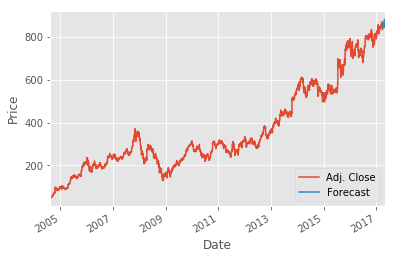

In [39]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date') 
plt.ylabel('Price') 
plt.show()